In [2]:
import numpy as np
import pylab as pl
from skfdiff import Model, Simulation

In [43]:
Nx = 500

x1 = -20.0
x2 = 20

U_i = 2.0
cu = 0.2
cd = -1.0
mu0 = 0.38
mu2 = -0.01

In [44]:
model = Model(["(-U_i * dxU + dxxU) + (2*cu * dxV - cd * dxxV) + (mu-cu*cu)*U",
               "(-U_i * dxV + dxxV) + (-2*cu * dxU + cd * dxxU) + (mu-cu*cu)*V"],
              ["U(x)", "V(x)"],
              parameters=["U_i", "cu", "cd", "mu","mue"])

In [45]:
x = np.linspace(x1,x2,num=Nx, dtype=np.float32)

In [46]:
n = 20
U = np.exp(-x**2)
V = np.exp(-x**2)

In [47]:
initial_fields = model.fields_template(x=x, U=U, V=V,U_i=U_i, cu=cu,cd=cd,mu=mu0,mue=mu2)

In [48]:
simulation = Simulation(model, initial_fields, dt=0.01, tmax=10)

In [49]:
container = simulation.attach_container()

In [50]:
simulation.run()


427209 running: t: 10: : 1000it [01:26, 11.61it/s]                              


(9.999999999999831,
 <xarray.Dataset>
 Dimensions:  (x: 500)
 Coordinates:
   * x        (x) float32 -20.0 -19.92 -19.84 -19.76 ... 19.76 19.84 19.92 20.0
 Data variables:
     U        (x) float64 -4.171e-06 -4.171e-06 -4.171e-06 ... 2.132 2.126 2.125
     V        (x) float64 -4.198e-06 -4.202e-06 -4.216e-06 ... 6.55 6.542 6.539
     U_i      float64 2.0
     cu       float64 0.2
     cd       float64 -1.0
     mu       float64 0.38
     mue      float64 -0.01)

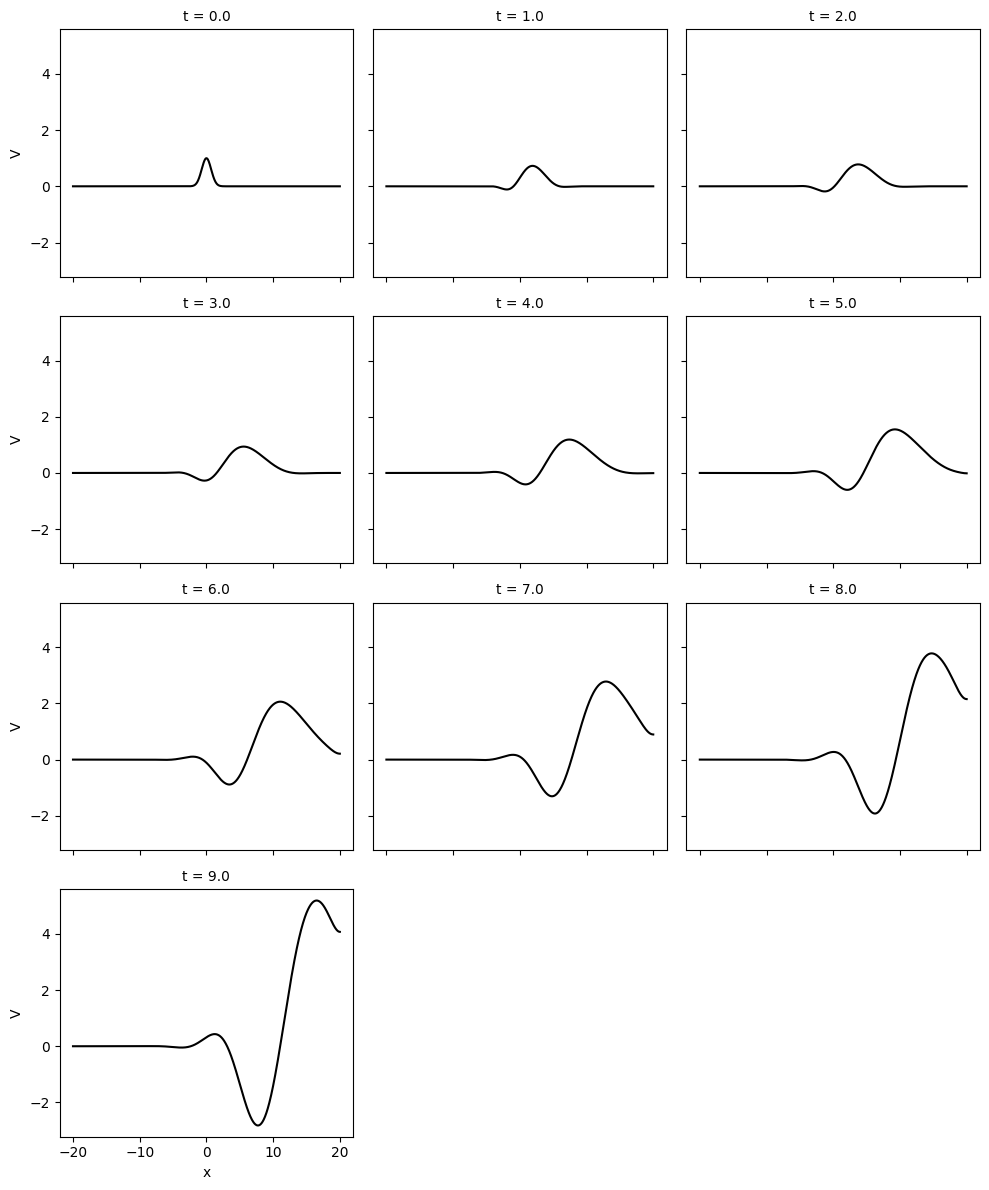

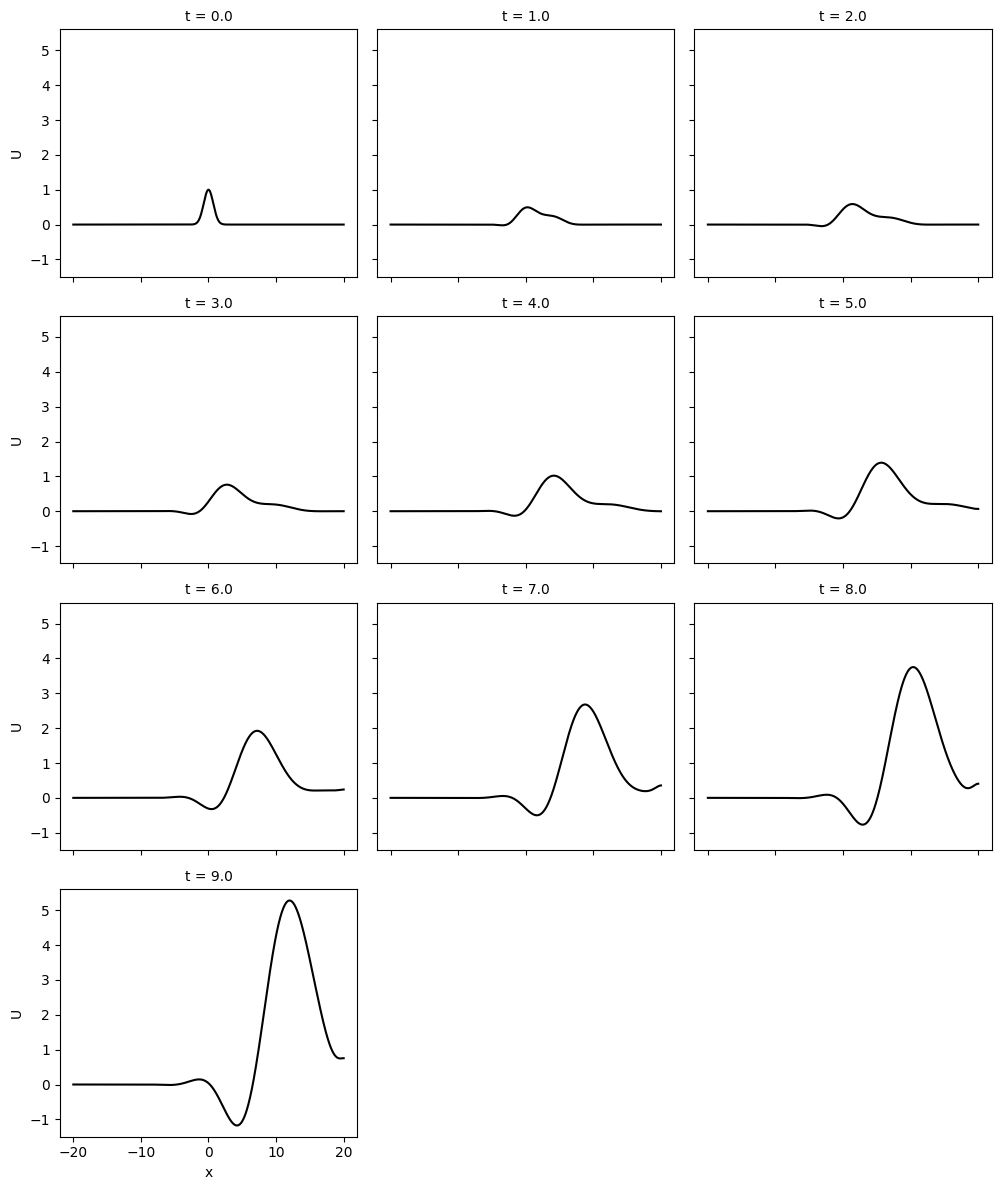

In [32]:
(
    container.data.V[: -2 : container.data.t.size // 10].plot(
        col="t", col_wrap=3, color="black"
    ),
    container.data.U[: -2 : container.data.t.size // 10].plot(
        col="t", col_wrap=3, color="black"
    )
)
pl.show()

In [51]:
data = container.data.copy()

In [52]:
data['U']

<xarray.DataArray 'U' (t: 1001, x: 500)>
array([[ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 1.04588498e-119,  1.83235698e-119,  2.67109403e-119, ...,
         2.51354171e-115,  5.79662434e-116,  1.86982375e-116],
       [-2.64136191e-103, -6.77760604e-103, -2.60234665e-102, ...,
        -1.36625886e-096, -3.68197696e-097, -1.38430601e-097],
       ...,
       [-4.11413897e-006, -4.11439451e-006, -4.11430224e-006, ...,
         2.08855888e+000,  2.08322375e+000,  2.08155049e+000],
       [-4.14257935e-006, -4.14284536e-006, -4.14278266e-006, ...,
         2.11016710e+000,  2.10473620e+000,  2.10302985e+000],
       [-4.17119767e-006, -4.17147426e-006, -4.17144146e-006, ...,
         2.13196656e+000,  2.12643936e+000,  2.12469972e+000]])
Coordinates:
  * x        (x) float32 -20.0 -19.92 -19.84 -19.76 ... 19.76 19.84 19.92 20.0
  * t        (t) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99 10.0

In [53]:
data.to_netcdf('saved_on_disk.nc')

In [54]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Text(0.5, 0, 'u')

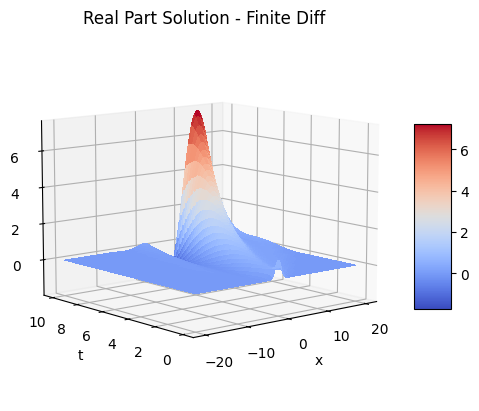

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Make data.
x = data['x']
t = data['t']
x, t = np.meshgrid(x, t)
z = data['U']

# Plot the surface.
surf = ax.plot_surface(x, t, z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.view_init(10, -130)
# Add a color bar which maps values to colors.
plt.title("Real Part Solution - Finite Diff")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')